In [1]:
%matplotlib inline
from fastai.basics import *

In [2]:
n=100

In [6]:
x=torch.ones(n,2)
x[:,0].uniform_(-1.,1)
print(x[:5])

tensor([[0.9622, 1.0000],
        [0.9884, 1.0000],
        [0.3074, 1.0000],
        [0.7957, 1.0000],
        [0.8898, 1.0000]])


In [8]:
a=tensor(3.,2);a

tensor([3., 2.])

In [9]:
y=x@a+torch.randn(n);y

tensor([ 3.3456,  3.2074,  2.1680,  2.9914,  4.4899,  2.3922,  0.6982,  0.5163,
         3.2314,  1.3212,  4.0556,  4.9775, -1.0274,  3.3169,  4.4116,  4.5064,
         0.6224,  0.8903, -1.0672,  4.0174, -0.5870, -1.5280, -0.1220, -0.8498,
         5.7423, -1.6270,  4.1429,  1.8476,  4.1146,  3.5818,  2.4331,  0.7202,
        -0.7856,  4.5107,  3.1919,  3.1754, -0.4855, -0.7100,  2.2465,  3.6396,
         3.5506,  1.3649,  0.9715,  3.7442, -1.4434,  1.2591,  3.4049,  4.7470,
         3.3864,  0.7551,  4.8401,  5.4139,  3.5855,  3.8090,  4.6146, -1.9134,
        -0.7927,  3.4217,  4.0909, -0.2904, -1.7545, -0.8284,  2.3257, -0.1161,
         6.7757,  3.3854,  1.4350,  2.0142, -1.6854,  2.5084, -0.3004,  3.5731,
         2.1493,  3.7393,  1.4198,  1.6976,  5.4570,  3.0426,  0.8614,  1.1200,
         2.1369,  0.2820, -0.8758,  1.2353, -0.8241,  2.0630, -1.6518,  4.2602,
         4.8344, -0.5909,  2.8037,  2.3396,  3.7683,  0.8715,  0.7051,  0.3525,
         2.3975, -2.1324,  3.1665,  0.95

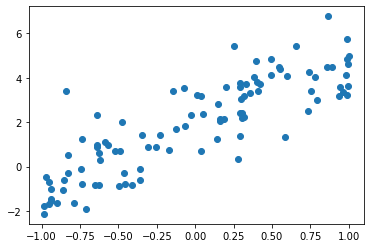

In [11]:
plt.scatter(x[:,0], y);

In [12]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [41]:
a=tensor(-1.,1)
a = nn.Parameter(a); a
lr=1e-1

In [42]:
def update():
    yhat=x@a
    loss=mse(yhat,y)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr*a.grad)
        a.grad.zero_()

In [43]:
for t in range(100):
    update()

tensor(7.9841, grad_fn=<MeanBackward0>)
tensor(2.3970, grad_fn=<MeanBackward0>)
tensor(1.4603, grad_fn=<MeanBackward0>)
tensor(1.2801, grad_fn=<MeanBackward0>)
tensor(1.2451, grad_fn=<MeanBackward0>)
tensor(1.2384, grad_fn=<MeanBackward0>)
tensor(1.2370, grad_fn=<MeanBackward0>)
tensor(1.2368, grad_fn=<MeanBackward0>)
tensor(1.2367, grad_fn=<MeanBackward0>)
tensor(1.2367, grad_fn=<MeanBackward0>)


In [44]:
a

Parameter containing:
tensor([2.8693, 1.9514], requires_grad=True)

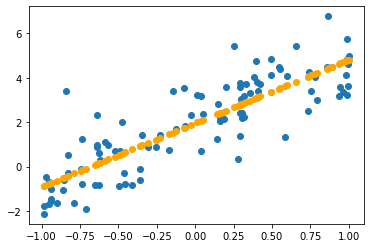

In [45]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach(),c='orange')